In [9]:
from pipeline import GAL
from utils.dataset_wrapper import WrapperDataset
from sklearn.linear_model import LogisticRegression
from ref.ActiveLearning_OG import AL

data_object = WrapperDataset("wineQT.pkl")
dataset = data_object.dataset
input_dim = data_object.dim
output_dim = data_object.num_labels

print(dataset["available_pool_samples"].shape)

gal = GAL(dataset=dataset,
    classifier=LogisticRegression(),
    budget_per_iter=8,
    iterations=100,
    uncertainty_measures=["pagerank"],
    quantile=0.1,
    sim_metric="euclidean",
    use_gnn=True,
    gnn_epochs=5,
    input_dim=input_dim,
    gnn_hidden=32,
    output_dim=output_dim,
    plot=False,
    AL4GE=False,
    coef=None,
    n_clusters=4,)

res_gal = gal.run(plot=False)

selection_criteria = ['random', 'custom']
accuracy_scores_dict = {}
for criterion in selection_criteria:
	AL_class = AL(dataset=dataset,
			   selection_criterion=criterion,
			   iterations=100,
			   budget_per_iter=8,
			   train_limit=int(1e6),)
	accuracy_scores_dict[criterion] = AL_class.run_pipeline()

(800, 11)
SimpleGNN(
  (encoder_conv1): GCNConv(11, 16)
  (encoder_conv2): SAGEConv(16, 16, aggr=sum)
  (decoder): Classifier(
    (model): Sequential(
      (0): Linear(in_features=16, out_features=64, bias=True)
      (1): ReLU()
      (2): Linear(in_features=64, out_features=128, bias=True)
      (3): ReLU()
      (4): Linear(in_features=128, out_features=6, bias=True)
    )
    (softmax): Softmax(dim=-1)
  )
)


100%|██████████| 100/100 [00:06<00:00, 15.17it/s, GAL_Iteration=99, GAL_Accuracy=0.555, GAL_LR test acc=0.651, GNN Train Acc=0.685, GNN Test Acc=0.555]


Accuracy: 0.59
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.62
----------------------------------------
Accuracy: 0.598
----------------------------------------
Accuracy: 0.603
----------------------------------------
Accuracy: 0.603
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.62
----------------------------------------
Accuracy: 0.603
----------------------------------------
Accuracy: 0.59
----------------------------------------
Accuracy: 0.576
----------------------------------------
Accuracy: 0.59
----------------------------------------
Accuracy: 0.598
----------------------------------------
Accuracy: 0.594
----------------------------------------
Accuracy: 0.598
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.607
----------------------------------------
Accuracy: 0.62
---------------------

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("results/results.csv")
df["dataset"] = df["dataset"].apply(lambda x: x.split(".")[0])
df["uncertainty_measures"] = df["uncertainty_measures"].apply(lambda x: "AGGR" if x not in ["area_variance", "pagerank", "density_kmean", "entropy_e", "AL4GE", "custom", "random"] else x)
df = df.drop(columns=['AL4GE'])
_dsts = set(df["dataset"])
df

,dataset,uncertainty_measures,GNN_avg,LR_avg,aggr_avg
0,iris,AGGR,0.848,0.878,0.851
1,iris,area_variance,0.878,0.862,0.883
2,iris,pagerank,0.833,0.813,0.837
3,iris,density_kmean,0.854,0.860,0.854
4,iris,entropy_e,0.860,0.883,0.862
5,iris,AL4GE,0.862,0.879,0.871
6,iris,custom,0.868,0.868,0.868
7,iris,random,0.832,0.832,0.832
8,wineQT,area_variance,0.520,0.589,0.521
9,wineQT,entropy_e,0.519,0.637,0.521


In [26]:
y = [0.92, 0.68, .7, 1, .65]

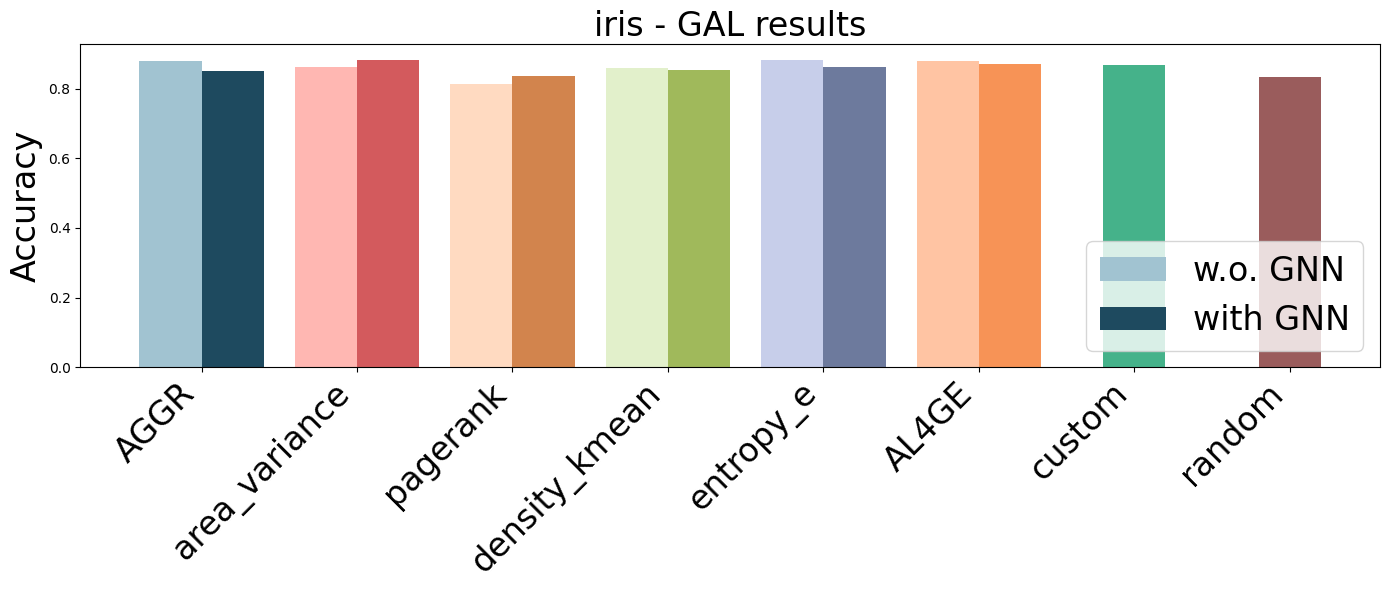

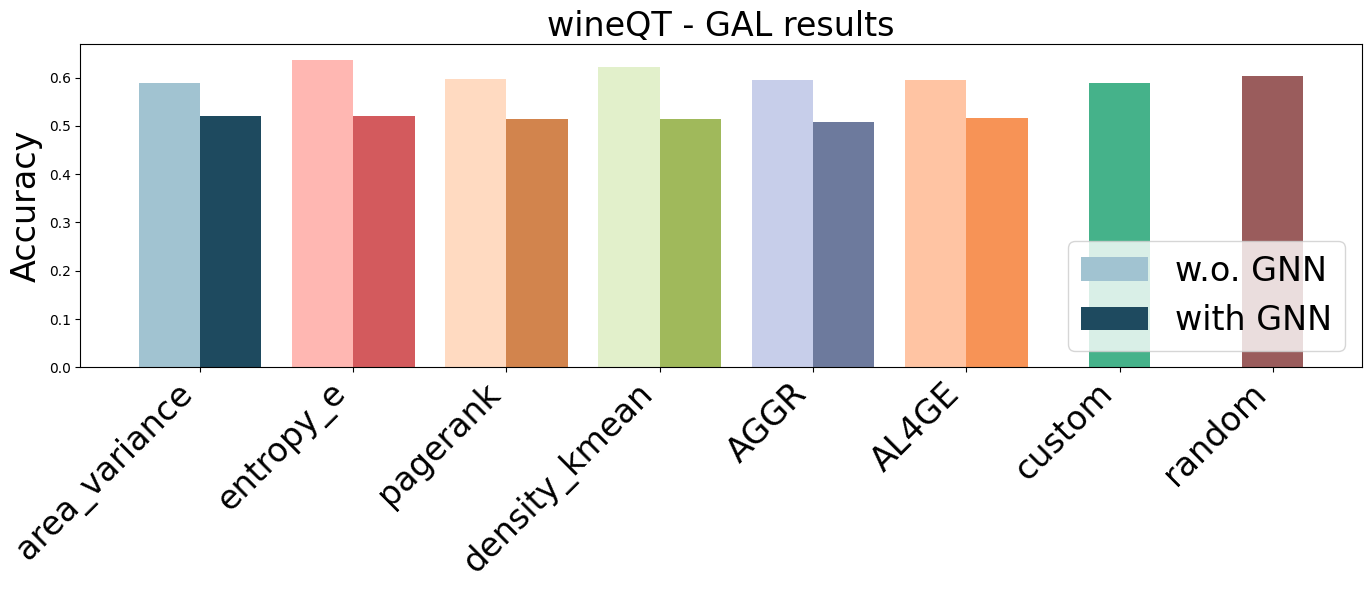

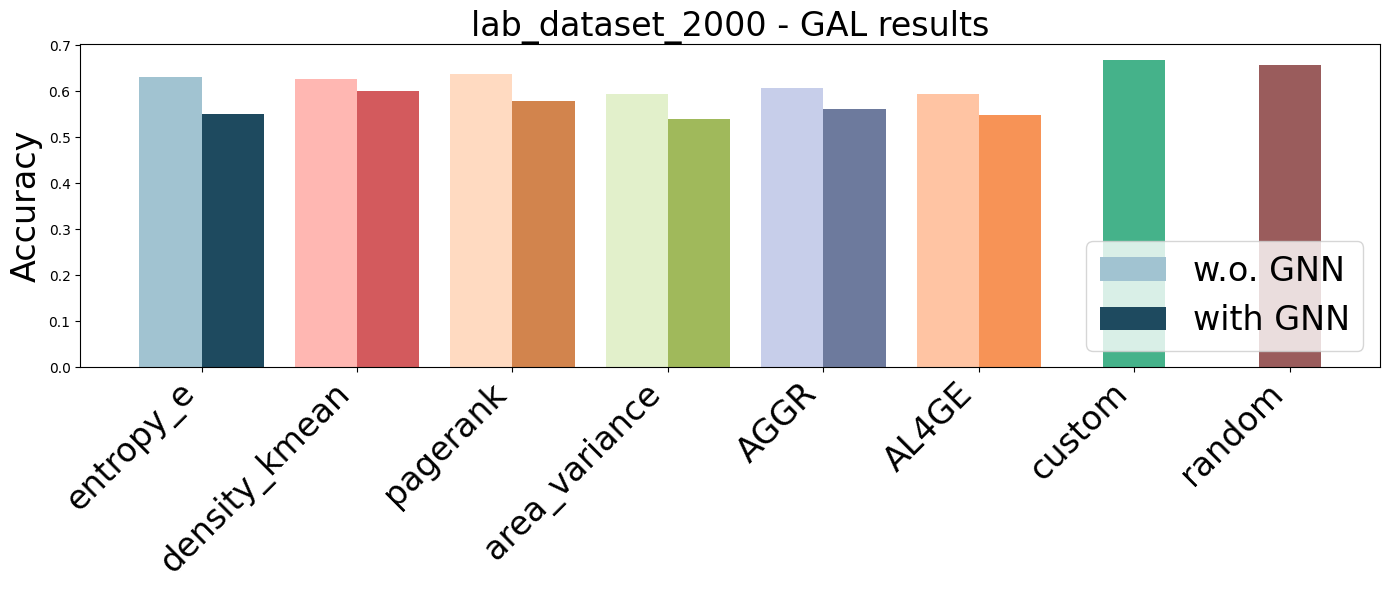

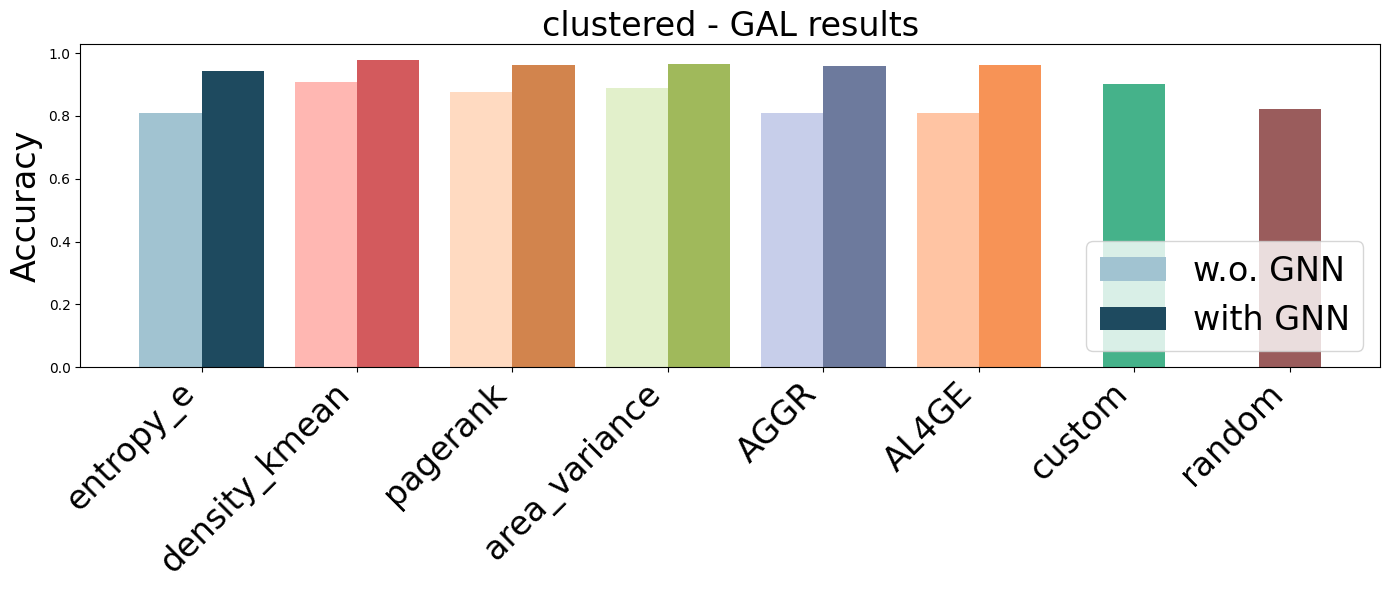

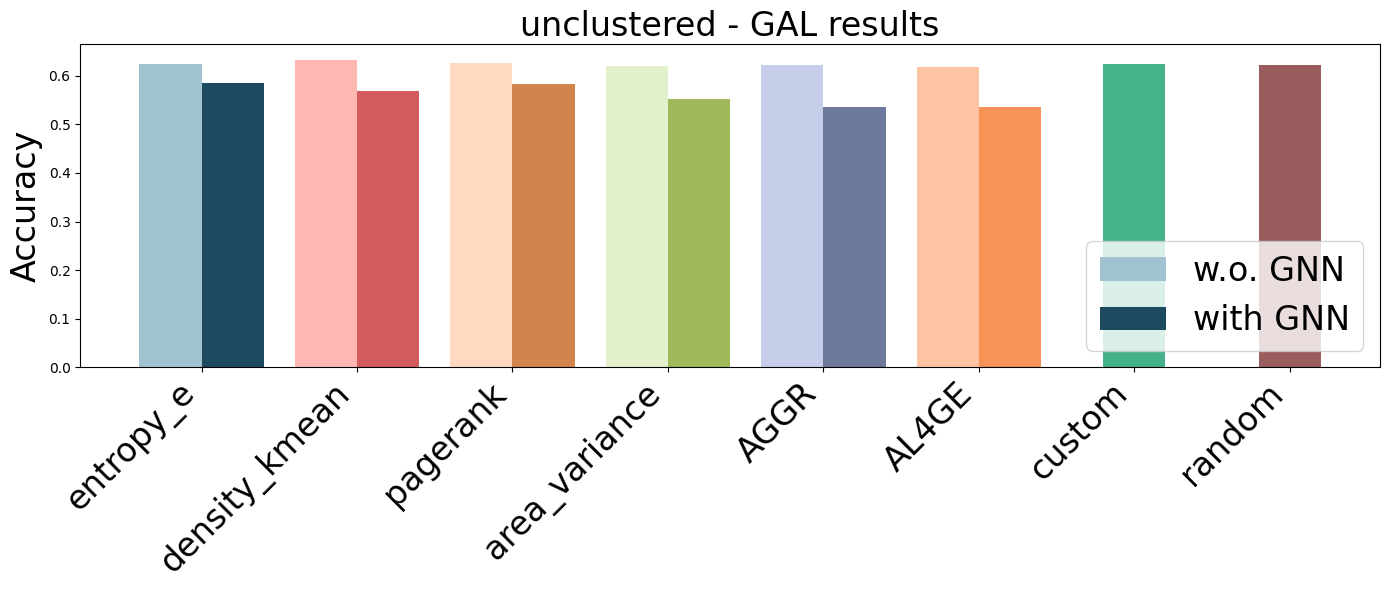

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already defined
for idx, dataset in enumerate(df['dataset'].unique()):
	data = df[df['dataset'] == dataset]
	colors = ["#A1C3D1", "#FFB7B2", "#FFDAC1", "#E2F0CB", "#C7CEEA", "#FFC4A3", "#B5EAD7", "#D4A5A5"]
	colors_solid = ["#1E4A5F", "#D35A5D", "#D2844D", "#A0B95B", "#6D7A9D", "#F79356", "#45B28A", "#9A5C5C"]
	
	width = .4
	fontsize = 24
	x = np.arange(len(data))

	# Create a figure and set of subplots
	fig, ax1 = plt.subplots(1, 1, figsize=(14, 6), sharey=True)

	# Loop over each uncertainty measure and plot accordingly
	i = 0
	for _, row in data.iterrows():
		if row['uncertainty_measures'] in ['custom', 'random']:
			# Plot only aggr_avg for custom and random
			ax1.bar(x[i], row["aggr_avg"], color=colors_solid[i], width=width)
		else:
			# Plot both LR_avg and aggr_avg for other uncertainty measures
			ax1.bar(x[i] - width / 2, row["LR_avg"], color=colors[i], width=width, label=f'w.o. GNN' if i == 0 else "")
			ax1.bar(x[i] + width / 2, row["aggr_avg"], color=colors_solid[i], width=width, label=f'with GNN' if i == 0 else "")
		i += 1

	ax1.set_xticks(x)
	ax1.set_xticklabels(data["uncertainty_measures"], rotation=45, ha="right", fontsize=fontsize)
	
	ax1.set_title(f"{dataset} - GAL results", fontsize=fontsize)
	# ax1.set_xlabel("Uncertainty Measures", fontsize=fontsize)
	ax1.set_ylabel("Accuracy", fontsize=fontsize)
	
	ax1.legend(fontsize=fontsize, loc="lower right")

	# Adjust layout
	plt.tight_layout()

	# Show plot
	# plt.show()
	plt.savefig(f'results/{dataset}.png')


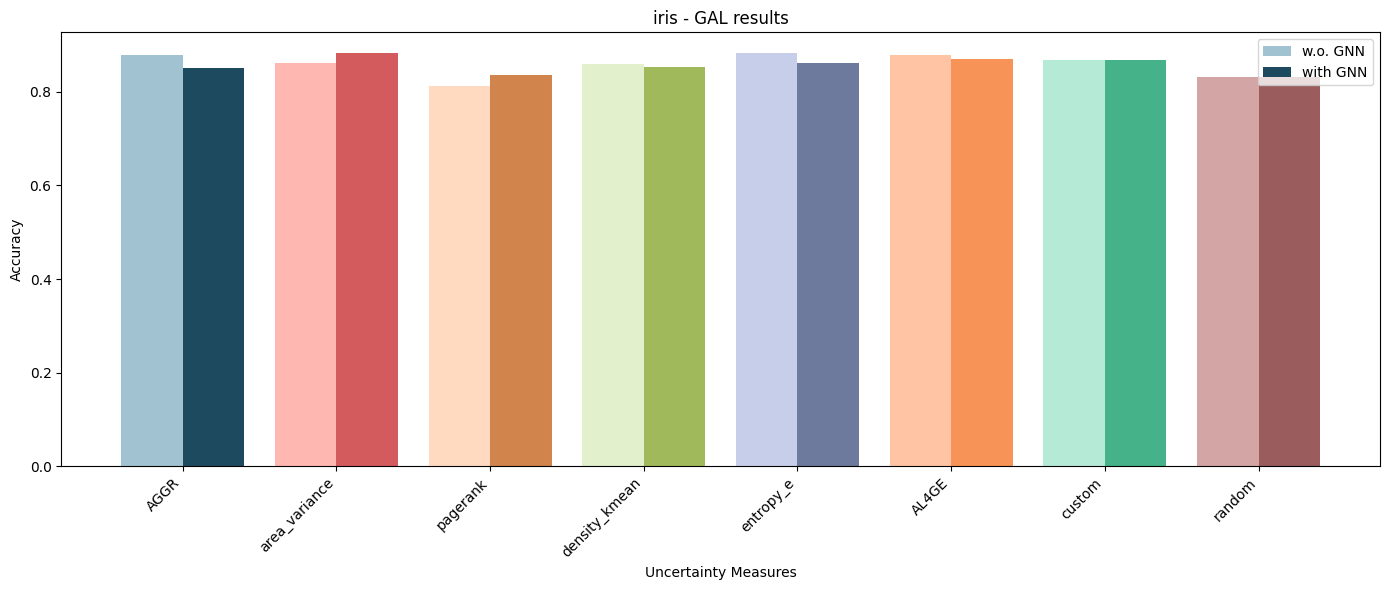

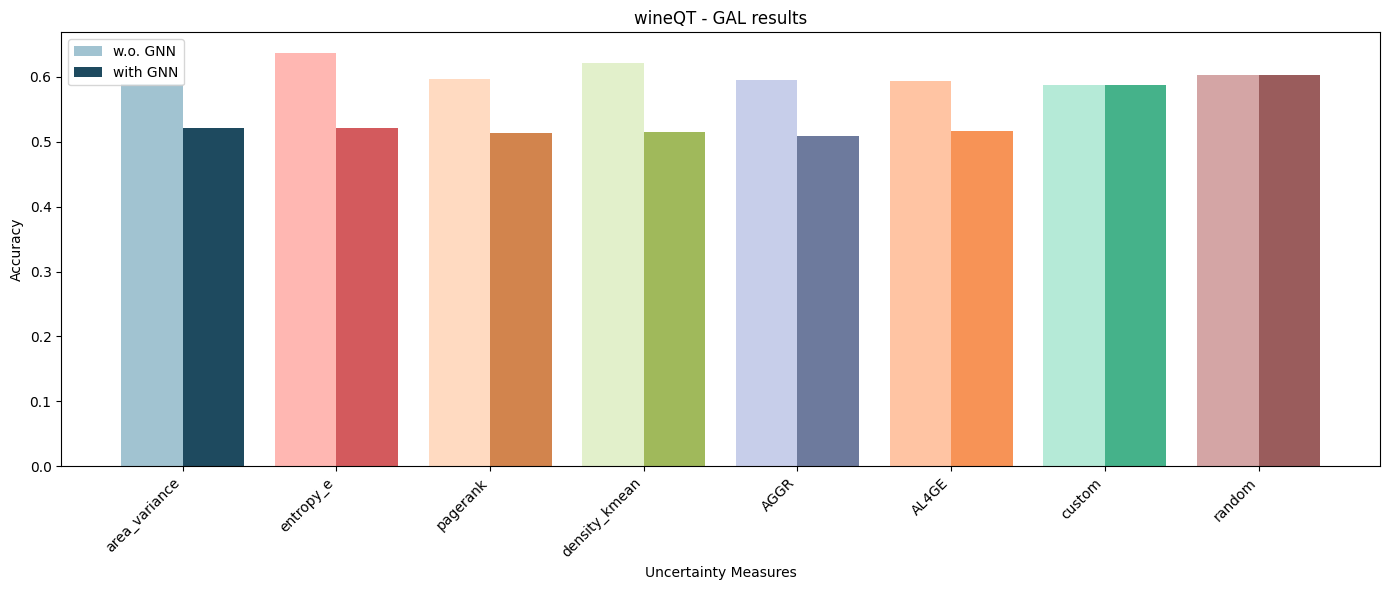

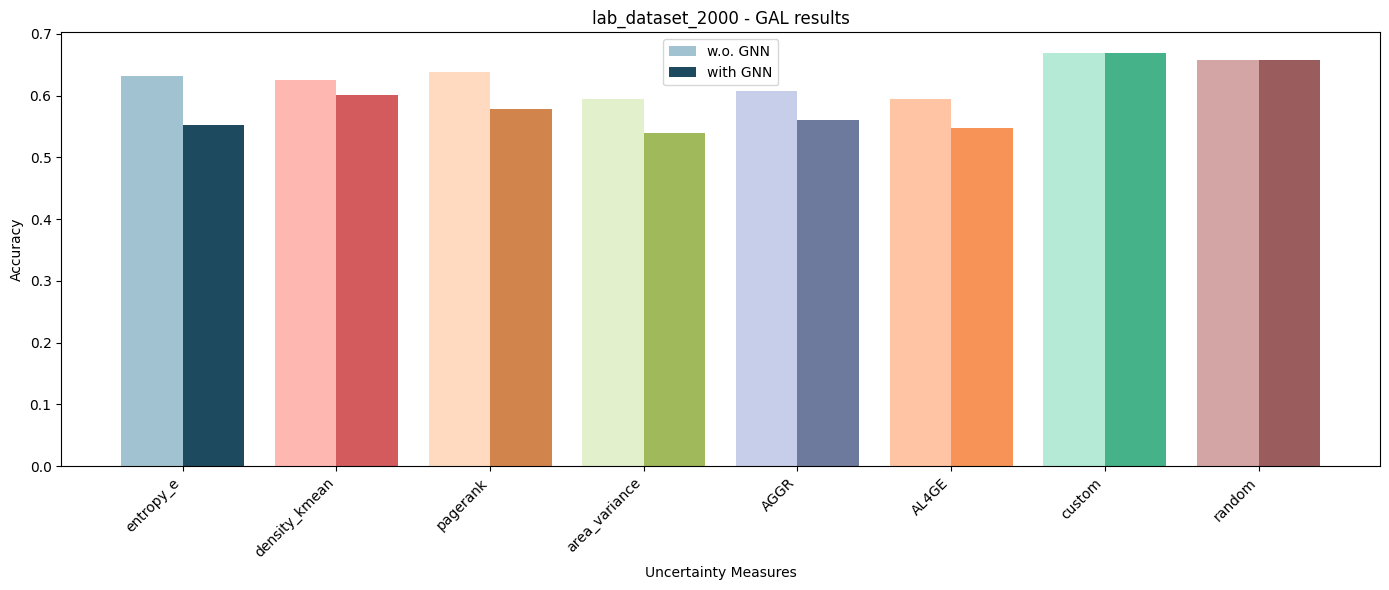

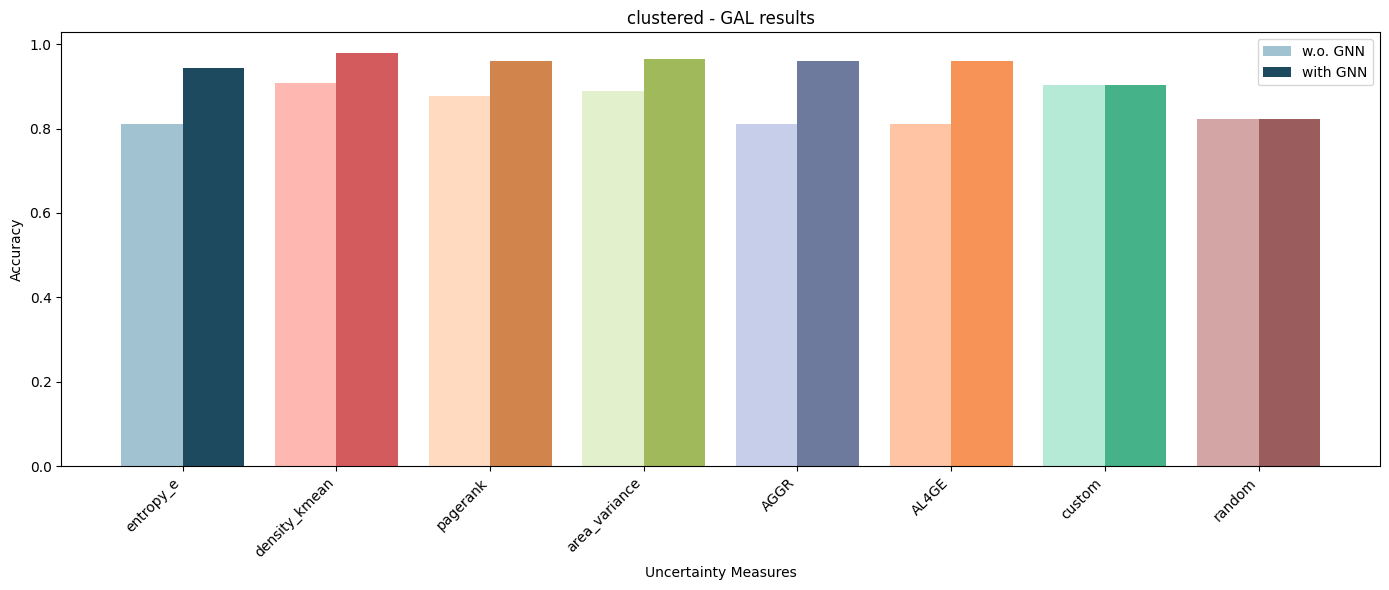

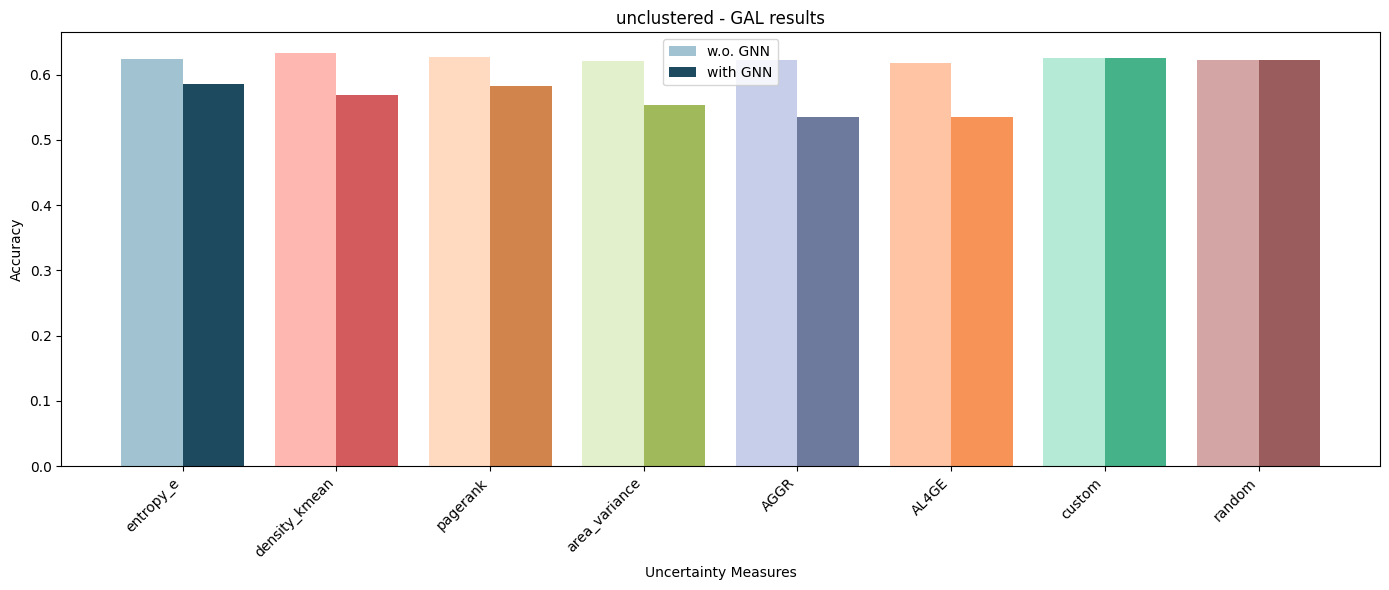

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

for idx, dataset in enumerate(df['dataset'].unique()):
	data = df[df['dataset'] == dataset]
	colors = ["#A1C3D1", "#FFB7B2", "#FFDAC1", "#E2F0CB", "#C7CEEA", "#FFC4A3", "#B5EAD7", "#D4A5A5"]
	colors_solid = ["#1E4A5F", "#D35A5D", "#D2844D", "#A0B95B", "#6D7A9D", "#F79356", "#45B28A", "#9A5C5C"]
	
	width = .4
	x = np.arange(len(data))

	# Create a figure and set of subplots
	fig, ax1 = plt.subplots(1, 1, figsize=(14, 6), sharey=True)

	# Plot LR_avg on the left
	bars1 = ax1.bar(x - width / 2, data["LR_avg"], color=colors, width=width, label='w.o. GNN')
	ax1.bar(x + width / 2, data["aggr_avg"], color=colors_solid, width=width, label='with GNN')
	ax1.set_xticks(x)
	ax1.set_xticklabels(data["uncertainty_measures"], rotation=45, ha="right")
	ax1.set_title(f"{dataset} - GAL results")
	ax1.set_xlabel("Uncertainty Measures")
	ax1.set_ylabel("Accuracy")
	plt.legend()

	# Adjust layout
	plt.tight_layout()

	# Show plot
	plt.show()


# for idx, dataset in enumerate(df['dataset'].unique()):
# 	data = df[df['dataset'] == dataset]
# 	# Set colors for each bar
# 	colors = ["#A1C3D1", "#FFB7B2", "#FFDAC1", "#E2F0CB", "#C7CEEA", "#FFC4A3", "#B5EAD7", "#D4A5A5"]

# 	# Plotting
# 	plt.figure(figsize=(10, 6))
# 	bars = plt.bar(data["uncertainty_measures"], data["aggr_avg"], color=colors)

# 	# Add title and labels
# 	plt.title(f"{dataset} - Comparison of Aggregated Averages for Different Uncertainty Measures")
# 	plt.xlabel("Uncertainty Measures")
# 	plt.ylabel("Aggregated Average (aggr_avg)")
# 	plt.xticks(rotation=45)

# 	# Create a legend
# 	plt.legend(bars, data["uncertainty_measures"], title="Uncertainty Measures", bbox_to_anchor=(1.05, 1), loc='upper left')

# 	# Display the plot
# 	plt.tight_layout()
# 	plt.show()


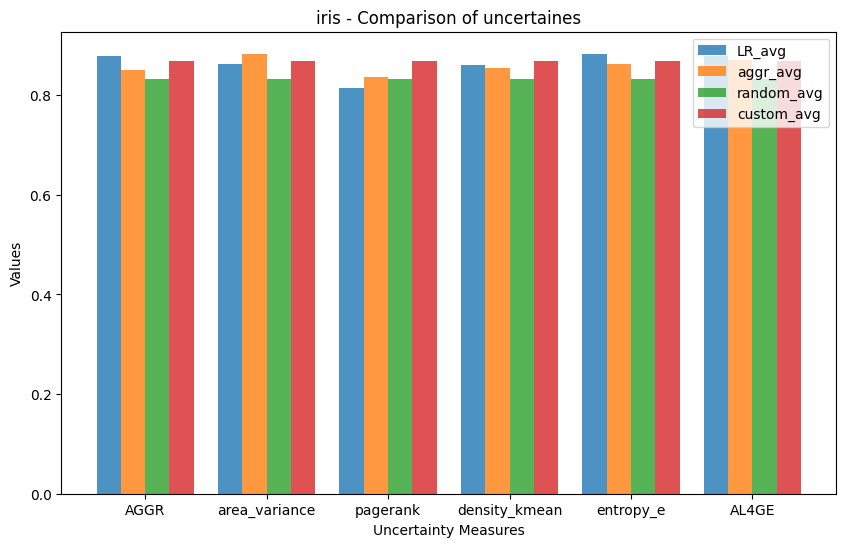

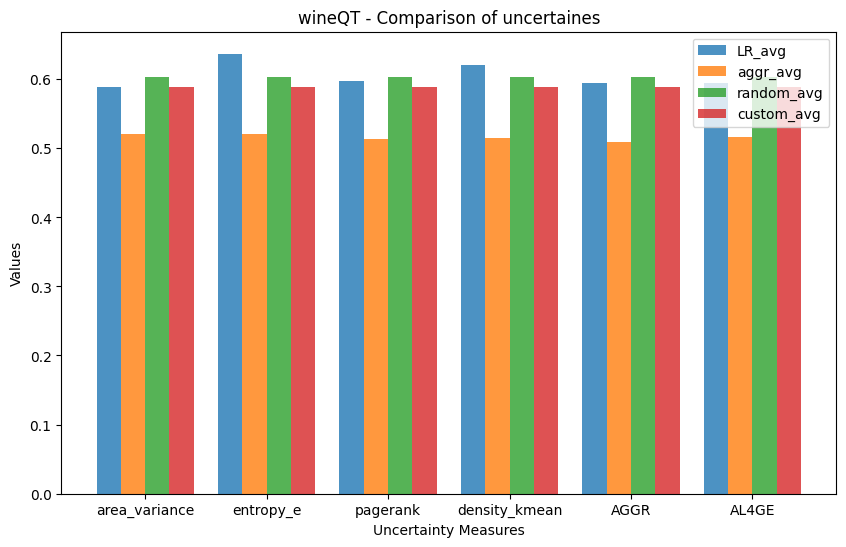

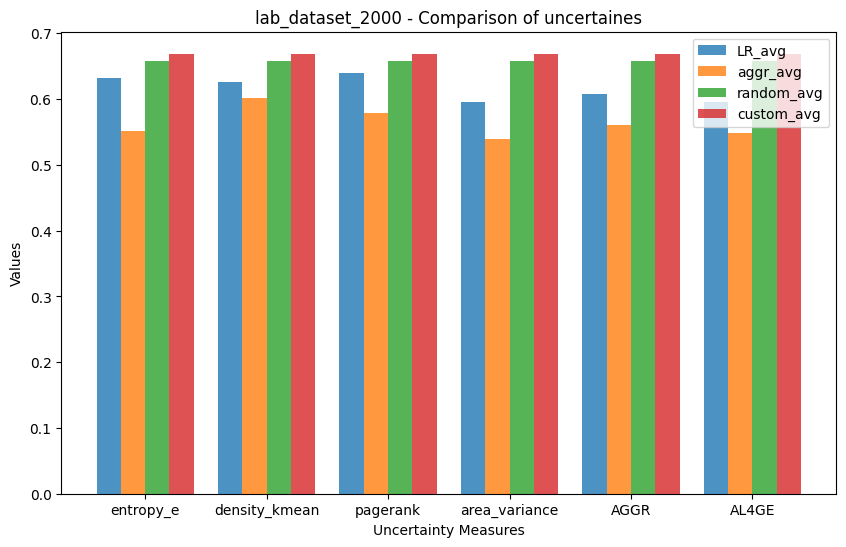

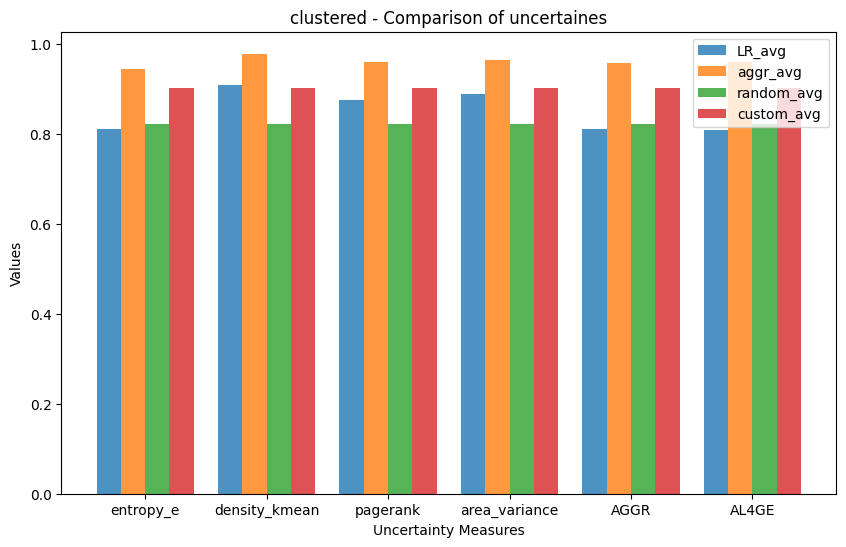

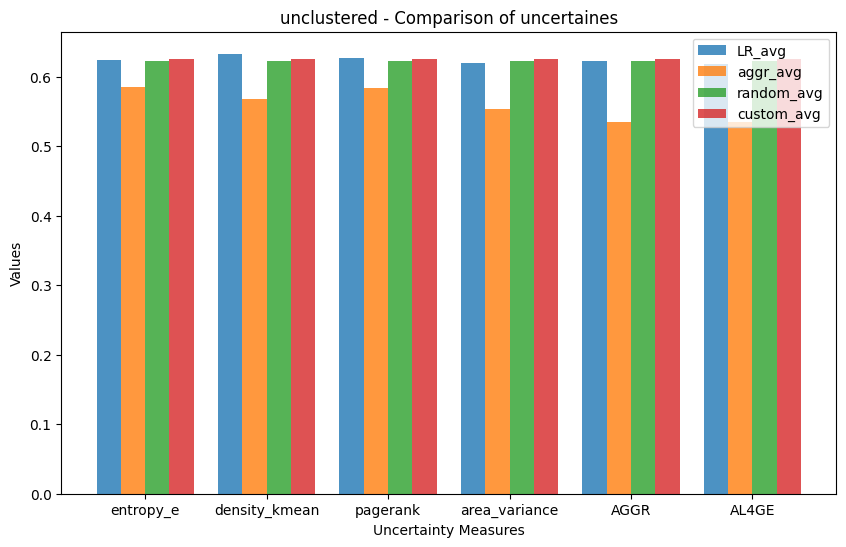

In [31]:
for idx, dataset in enumerate(df['dataset'].unique()):
    # Filter data for the current dataset
    subset = df[df['dataset'] == dataset]
    
    # Set the width for bars and positions on x-axis
    bar_width = 0.2
    x = np.arange(len(subset))
    
    # Plot 1: LR_avg, random_avg, custom_avg
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(x - 1.5 * bar_width, subset['LR_avg'], width=bar_width, label='LR_avg', alpha=.8)
    ax.bar(x - bar_width / 2, subset['aggr_avg'], width=bar_width, label='aggr_avg', alpha=.8)
    ax.bar(x + bar_width / 2, subset['random_avg'], width=bar_width, label='random_avg', alpha=.8)
    ax.bar(x + 1.5 * bar_width, subset['custom_avg'], width=bar_width, label='custom_avg', alpha=.8)
    
    ax.set_xticks(x)
    ax.set_xticklabels(subset['uncertainty_measures'])
    ax.set_xlabel('Uncertainty Measures')
    ax.set_ylabel('Values')
    ax.set_title(f'{dataset} - Comparison of uncertaines')
    # ax.set_ylim((0.5, y[idx]))
    ax.legend()
    plt.show()
    